<a href="https://colab.research.google.com/github/cpeiret/CSC8635/blob/main/CSC8635_Machine_Learning_with_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Preamble



In [1]:
# Install any libraries and modules needed
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     | 39.1MB 4.2MB/s
     |████████████████████████████████| 81kB 6.7MB/s 
     |████████████████████████████████| 604kB 14.7MB/s 
     |████████████████████████████████| 3.1MB 26.0MB/s 
     |████████████████████████████████| 61kB 8.3MB/s 
     |████████████████████████████████| 81kB 11.5MB/s 
     |████████████████████████████████| 296kB 38.6MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.10.0-py2.py3-none-any.whl size=239950 sha256=436ace8dc97967c21332fc7d74b21b8d426cdc737cfb78d36df65fc781ed5a21
  Stored in directory: /tmp/pip-ephem-wheel-cache-ua0bvj8j/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=887cab945a236acfc3cf3a1b01d31c95f9d34d10c5bff63cf2fccee4ad2b4909
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for phik: filename=phik-0.11.0-cp36-none-any.whl size=599738 sha256=

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas_profiling import ProfileReport


from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [3]:
# Load data
url_train = 'https://raw.githubusercontent.com/cpeiret/CSC8635/main/train.csv'
train = pd.read_csv(url_train)

url_test = 'https://raw.githubusercontent.com/cpeiret/CSC8635/main/testdata_with_groundTruth.csv'
test = pd.read_csv(url_test)

In [57]:
# Create confusion matrix
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

# 2. Exploratory Data Analysis

In [4]:
train.profile_report()

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# 3. Data Wrangling

In [9]:
# Input Age missing values based on Title

train['Title'] = train.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip()) # Get titles
normalised_titles = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"
}
train.Title = train.Title.map(normalised_titles)
print(train.Title.value_counts())
grouped = train.groupby(['Sex','Pclass', 'Title'])
grouped.Age.median()
train.Age = grouped.Age.apply(lambda x: x.fillna(x.median()))


Mr         517
Miss       184
Mrs        127
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64


In [10]:
# Same thing for test data
test['Title'] = test.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip()) # Get titles
normalised_titles = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"
}
test.Title = test.Title.map(normalised_titles)
print(test.Title.value_counts())
grouped = test.groupby(['Sex','Pclass', 'Title'])
grouped.Age.median()
test.Age = grouped.Age.apply(lambda x: x.fillna(x.median()))


Mr         240
Miss        78
Mrs         73
Master      21
Officer      5
Royalty      1
Name: Title, dtype: int64


In [11]:
# Create age groups
data = [train, test]
for datasets in data:
  datasets['AgeGroup'] = datasets['Age'].astype(int)
  datasets.loc[(datasets["Age"] <= 15), "AgeGroup"] = "<= 15"
  datasets.loc[(datasets["Age"] > 15) & (datasets["Age"] <= 25), "AgeGroup"] = "16-25"
  datasets.loc[(datasets["Age"] > 25) & (datasets["Age"] <= 35), "AgeGroup"] = "26-35"
  datasets.loc[(datasets["Age"] > 35) & (datasets["Age"] <= 45), "AgeGroup"] = "36-45"
  datasets.loc[(datasets["Age"] > 45) & (datasets["Age"] <= 55), "AgeGroup"] = "46-55"
  datasets.loc[(datasets["Age"] > 55) & (datasets["Age"] <= 65), "AgeGroup"] = "56-65"
  datasets.loc[(datasets["Age"] > 65), "AgeGroup"] = ">65"

In [12]:
# Calcualte family size
data = [train, test]
for datasets in data:
  datasets['FamilySize'] = train.Parch + train.SibSp + 1

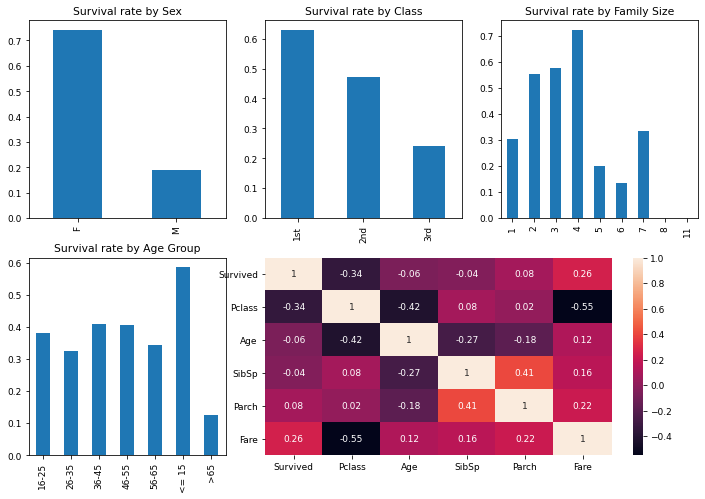

In [13]:
fig, ax = plt.subplots(2, 3, figsize = (12,8), sharex='col', sharey='row')
plt.rcParams.update({'font.size': 9})

plt.subplot2grid((2,3),(0,0))
train.groupby("Sex")["Survived"].mean().plot(kind = "bar")
plt.title("Survival rate by Sex")
plt.xlabel("")
plt.xticks(np.arange(2), ('F','M'))

plt.subplot2grid((2,3),(0,1))
train.groupby("Pclass")["Survived"].mean().plot(kind = "bar")
plt.title("Survival rate by Class")
plt.xlabel("")
plt.xticks(np.arange(3), ('1st','2nd','3rd'))

plt.subplot2grid((2,3),(0,2))
train.groupby("FamilySize")["Survived"].mean().plot(kind = "bar")
plt.title("Survival rate by Family Size")
plt.xlabel("")

plt.subplot2grid((2,3),(1,0), colspan=1)
train.groupby("AgeGroup")["Survived"].mean().plot(kind = "bar")
plt.title("Survival rate by Age Group")
plt.xlabel("")

plt.subplot2grid((2,3),(1,1), colspan=2)
x_axis_labels = ["Passenger Id", "Survived", "Class", "Age", "Siblings/Spouses", "Parents/Children","Fare"]  # labels for x-axis
y_axis_labels = [1,2,3,4,5,6,7] # labels for y-axis
sns.heatmap(train[['Survived','Pclass','Age','SibSp','Parch','Fare']].corr().round(2),annot=True)

fig.savefig('SurvivalCorr.png')



In [14]:
# Convert variables into dummies
train = pd.get_dummies(train,columns=['Pclass','Sex','FamilySize', 'AgeGroup']) # Create dummy variables
test = pd.get_dummies(test,columns=['Pclass','Sex','FamilySize','AgeGroup'])

In [15]:
# Separate data for training and testing
X_train = train.drop(columns=['PassengerId','Survived','Name', 'Age', 'Ticket', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Title', 'Sex_male','Embarked'])
X_test = test.drop(columns=['PassengerId','Survived','Name', 'Age', 'Ticket', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Title', 'Sex_male','Embarked'])

y_train = train.Survived.values
y_test = test.Survived.values

# 4. Machine Learning


## 4.1 Model Selection based on Ten-Fold Cross-Validation

### 4.1.1 Logistic Regression

In [51]:
# Average score after 10-fold CV
print(round(cross_val_score(LogisticRegression(), X_train, y_train,cv=10).mean(),3))
print(round(cross_val_score(LogisticRegression(), X_train, y_train,cv=10).std(),3))

0.817
0.028


### 4.1.2 Decision Tree

In [52]:
print(round(cross_val_score(DecisionTreeClassifier(), X_train, y_train,cv=10).mean(),3))
print(round(cross_val_score(DecisionTreeClassifier(), X_train, y_train,cv=10).std(),3))

0.81
0.032


### 4.1.3 Random Forest

In [53]:
print(round(cross_val_score(RandomForestClassifier(), X_train, y_train,cv=10).mean(),3))
print(round(cross_val_score(RandomForestClassifier(), X_train, y_train,cv=10).std(),3))

0.815
0.031


### 4.1.4 K-Nearest Neighbour

In [54]:
print(round(cross_val_score(KNeighborsClassifier(), X_train, y_train,cv=10).mean(),3))
print(round(cross_val_score(KNeighborsClassifier(), X_train, y_train,cv=10).std(),3))

0.77
0.045


### 4.1.5 Stochastic Gradient Descent (SGD)

In [55]:
print(round(cross_val_score(linear_model.SGDClassifier(), X_train, y_train,cv=10).mean(),3))
print(round(cross_val_score(linear_model.SGDClassifier(), X_train, y_train,cv=10).std(),3))

0.804
0.043


### 4.1.6 Support Vector Machine (SVM)

In [56]:
print(round(cross_val_score(SVC(), X_train, y_train,cv=10).mean(),3))
print(round(cross_val_score(SVC(), X_train, y_train,cv=10).std(),3))

0.826
0.035


## 4.2 Hyperparameter Tuning

### 4.2.1 Support Vector Machine

In [58]:
svm_par = {'C': [10.5,11,11.5],'gamma': ['scale', 'auto']}
svm_grid = GridSearchCV(SVC(), svm_par, cv=10)
svm_grid.fit(X_train, y_train)
svm_grid.best_params_

{'C': 10.5, 'gamma': 'auto'}

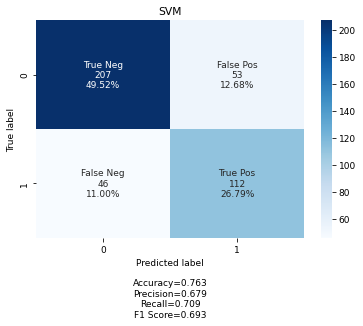

In [59]:
svm = SVC(C=10.5, gamma='auto').fit(X_train, y_train)
svm_pred = svm.predict(X_test)

# Confusion matrix
cm_svm = confusion_matrix(y_test, svm_pred)
labels = ["True Neg","False Pos","False Neg","True Pos"]
categories = [0, 1]
make_confusion_matrix(cm_svm, 
                      group_names=labels,
                      categories=categories,
                      title = 'SVM'
                      )

### 4.2.2 Logistic Regression

In [60]:
lr_param = {'penalty': ['l1','l2','elasticnet','none'],
              'C':[1.5,2,2.5],
              'solver': ['newton-cg','lbfgs','liblinear','sag','saga'],
              }
logistic_grid = GridSearchCV(LogisticRegression(), lr_param, cv=10)
logistic_grid.fit(X_train, y_train)
logistic_grid.best_params_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_

{'C': 2, 'penalty': 'l2', 'solver': 'newton-cg'}

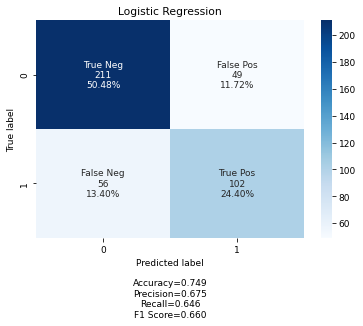

In [61]:
# Optimal model Logistic Regression
logistic_opt = LogisticRegression(C = 2, penalty='l2', solver='newton-cg').fit(X_train,y_train)
logistic_opt_pred = logistic_opt.predict(X_test)

# Confusion matrix
cm_lr = confusion_matrix(y_test, logistic_opt_pred)
labels = ["True Neg","False Pos","False Neg","True Pos"]
categories = [0, 1]
make_confusion_matrix(cm_lr, 
                      group_names=labels,
                      categories=categories,
                      title = 'Logistic Regression')

### 4.2.3 Random Forest

In [62]:
rf_params =  {'n_estimators':[10,100],
              'criterion':['gini','entropy'],
              'min_samples_split':[1,3,5],
              'max_features':['auto', 'sqrt','log2'],
              'min_samples_leaf':[1,3,5],
              'bootstrap':['True','False']}
rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv=10)
rf_grid.fit(X_train, y_train)
rf_grid.best_params_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

{'bootstrap': 'True',
 'criterion': 'entropy',
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 10}

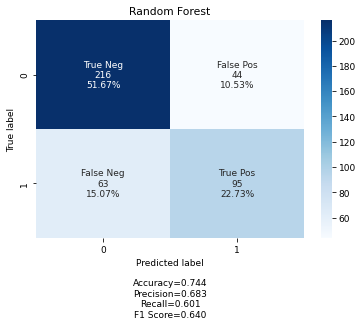

In [63]:
rf = RandomForestClassifier(bootstrap=True,
                             criterion='entropy',
                             max_features='log2',
                             min_samples_leaf=1,
                             min_samples_split=5,
                             n_estimators=10,
                            random_state=10)
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

# Confusion matrix
cm_rf = confusion_matrix(y_test, rf_pred)
labels = ["True Neg","False Pos","False Neg","True Pos"]
categories = [0, 1]
cm_rf1 = make_confusion_matrix(cm_rf, 
                      group_names=labels,
                      categories=categories,
                      title='Random Forest')